# Hotel Booking and Cancellation Dataset

#### This dataset contains booking made in two types of hotels - 1. City Hotel, 2. Resort Hotel
#### The response column is if the customer cancelled the reservation or not
#### There are 31 other input variables like booking lead time, reserved data/month, room type, No. of guests, No. of nights stayed and so on

## Importing Packages and Dataset:

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import pycountry_convert as pc
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


### Checking number of missing values in each field:

In [4]:
print('The dataset has {} instances of bookings' .format(df.shape[0]))
df.isnull().sum()

The dataset has 119390 instances of bookings


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### I'm replacing the missing values of children by 0, country by 'unknown' and leave agent and company as such

In [5]:
# Defining a dictionary for replacement of missing values
na_replacement = {'children' : 0, 'country' : 'Unknown'}

#Replacing na with the dictionary values
df = df.fillna(na_replacement)

#Meal column has teo values'Undefined' and 'SC' which both mean the same. So I'm replacing Undefined by SC
df['meal'].replace('Undefined','SC', inplace=True)

#Replace country code of Canada from CN to te correct value of CAN
df['country'].replace('CN','CAN', inplace=True)

## Defining new variables based on existing ones (Data mining and Feature Extraction):
#### 1. Grouping countries into continents and adding a new field - country name instead of codes
#### 2. Creating a new field called 'guest_type' which classifies only adults, only children, family and no guests registered during booking

In [6]:
#pip install pycountry
#import sys
#!{sys.executable} -m pip install pycountry_convert

In [7]:
#create a dictionary of country codes to country names
country_code = {}
for country in pycountry.countries:
    country_code[country.alpha_3] = country.name

#Create a new field 'country_name' from country codes
df['country_name'] = df['country'].replace(country_code)

In [8]:
#Create a dictionary of country names to continent names

continent_dict = {'AS':'Asia','NA':'North America','SA':'South America','AF':'Africa','EU':'Europe','OC':'Australia',
                 'AN':'Antarctica'}

country_list = [i.name for i in pycountry.countries]
unwanted_region = ['Antarctica','French Southern Territories','Western Sahara','Pitcairn','Sint Maarten (Dutch part)',
                  'Timor-Leste','United States Minor Outlying Islands','Holy See (Vatican City State)']
country_list_final = [i for i in country_list if i not in unwanted_region]

conti_code = {}

for country in country_list_final:
    conti_code[country] = continent_dict[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))]

#Create a new field 'continent' from country_name
df['continent'] = df['country_name'].replace(conti_code)

In [9]:
df['continent'].value_counts()

df['continent'].loc[df[(df['continent']=='French Southern Territories') | (df['continent']=='TMP') |
                   (df['continent']=='United States Minor Outlying Islands')].index] = 'Unknown'

In [10]:
df['continent'].value_counts()

Europe           107826
North America      3553
Asia               3189
South America      2708
Africa             1113
Australia           506
Unknown             493
Antarctica            2
Name: continent, dtype: int64

In [11]:
# Create a field for type of guest - Single adult, Family, No guest, Only children

df['guest_type'] = np.repeat('No guest', len(df))

df['guest_type'].loc[df[(df['adults']==1) & (df['children']==0) & (df['babies']==0) ].index] = 'Single adult'
df['guest_type'].loc[df[(df['adults']>=1) & ((df['adults'] + df['children'] + df['babies']) > 1)].index] = 'Family'
df['guest_type'].loc[df[(df['adults']==0) & (df['children'] + df['babies'] > 0) ].index] = 'Only children'


In [12]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'country_name',
 'continent',
 'guest_type']

## Exploratory Data Analysis

### Finding where most guests come from:

In [13]:
# Country of residence of guests:

guest_country = pd.DataFrame({'No. of guests':df[df['is_canceled']==0]['country_name'].value_counts()})

guest_country['Country'] = guest_country.index
guest_country['% of total'] = round(guest_country['No. of guests']*100/guest_country['No. of guests'].sum(),2)
guest_country['Country_code'] = guest_country['Country'].replace(dict(zip(df['country_name'].values,df['country'].values)))
guest_country['Continent'] = guest_country['Country'].replace(conti_code)

guest_country

,No. of guests,Country,% of total,Country_code,Continent
Portugal,21071,Portugal,28.03,PRT,Europe
United Kingdom,9676,United Kingdom,12.87,GBR,Europe
France,8481,France,11.28,FRA,Europe
Spain,6391,Spain,8.50,ESP,Europe
Germany,6069,Germany,8.07,DEU,Europe
...,...,...,...,...,...
Macao,1,Macao,0.00,MAC,Asia
Burkina Faso,1,Burkina Faso,0.00,BFA,Africa
French Southern Territories,1,French Southern Territories,0.00,ATF,French Southern Territories
Bahrain,1,Bahrain,0.00,BHR,Asia


In [62]:
fig = px.pie(guest_country,
             values="No. of guests",
             names="Country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

<Figure size 288x288 with 0 Axes>

In [15]:
guest_country1 = pd.DataFrame({'No. of guests':df[df['is_canceled']==0]['country'].value_counts()})

guest_country1['Country'] = guest_country1.index
guest_country1['% of total'] = round(guest_country1['No. of guests']*100/guest_country1['No. of guests'].sum(),2)

guest_country1

,No. of guests,Country,% of total
PRT,21071,PRT,28.03
GBR,9676,GBR,12.87
FRA,8481,FRA,11.28
ESP,6391,ESP,8.50
DEU,6069,DEU,8.07
...,...,...,...
LCA,1,LCA,0.00
MLI,1,MLI,0.00
BDI,1,BDI,0.00
ATF,1,ATF,0.00


In [16]:
guest_map = px.choropleth(guest_country,
                    locations='Country_code',
                    color='% of total', 
                    hover_name='Country', 
                    color_continuous_scale= 'Reds',   #px.colors.sequential.Plasma,
                    range_color=(-5, 30),
                    title="Home country of guests")
guest_map.show()

In [17]:
guest_map = px.choropleth(guest_country[guest_country['Continent']=='Europe'],
                    locations='Country_code',
                    color='% of total', 
                    hover_name='Country', 
                    color_continuous_scale= 'Reds',
                    scope = 'europe',
                    range_color=(-5, 30),
                    title="Home country of European guests")
guest_map.show()

### Creating a boxplot of room rates for each type of room and hotel type:

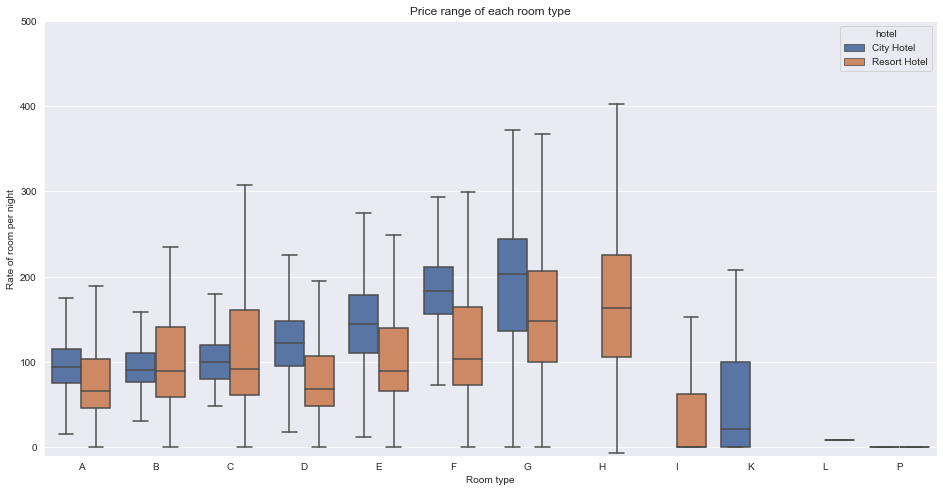

In [64]:
plt.figure(figsize=(16, 8))
plt.ylim(-10, 500)

sns.set_style("darkgrid")
sns.boxplot(data = df.sort_values(by = 'assigned_room_type'),
           x = 'assigned_room_type',
           y = 'adr',
           hue = 'hotel',
           fliersize = 0,
           )
plt.title('Price range of each room type')
plt.xlabel('Room type')
plt.ylabel('Rate of room per night')
plt.show()

In [19]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'country_name',
 'continent',
 'guest_type']

## Price variation of rooms by season

In [20]:
#Create a new dataframe for room price for each month
room_price = df[['hotel','arrival_date_month','assigned_room_type','adr']]

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

room_price['arrival_date_month'] = pd.Categorical(room_price["arrival_date_month"],
                                                 categories=ordered_months, ordered=True)

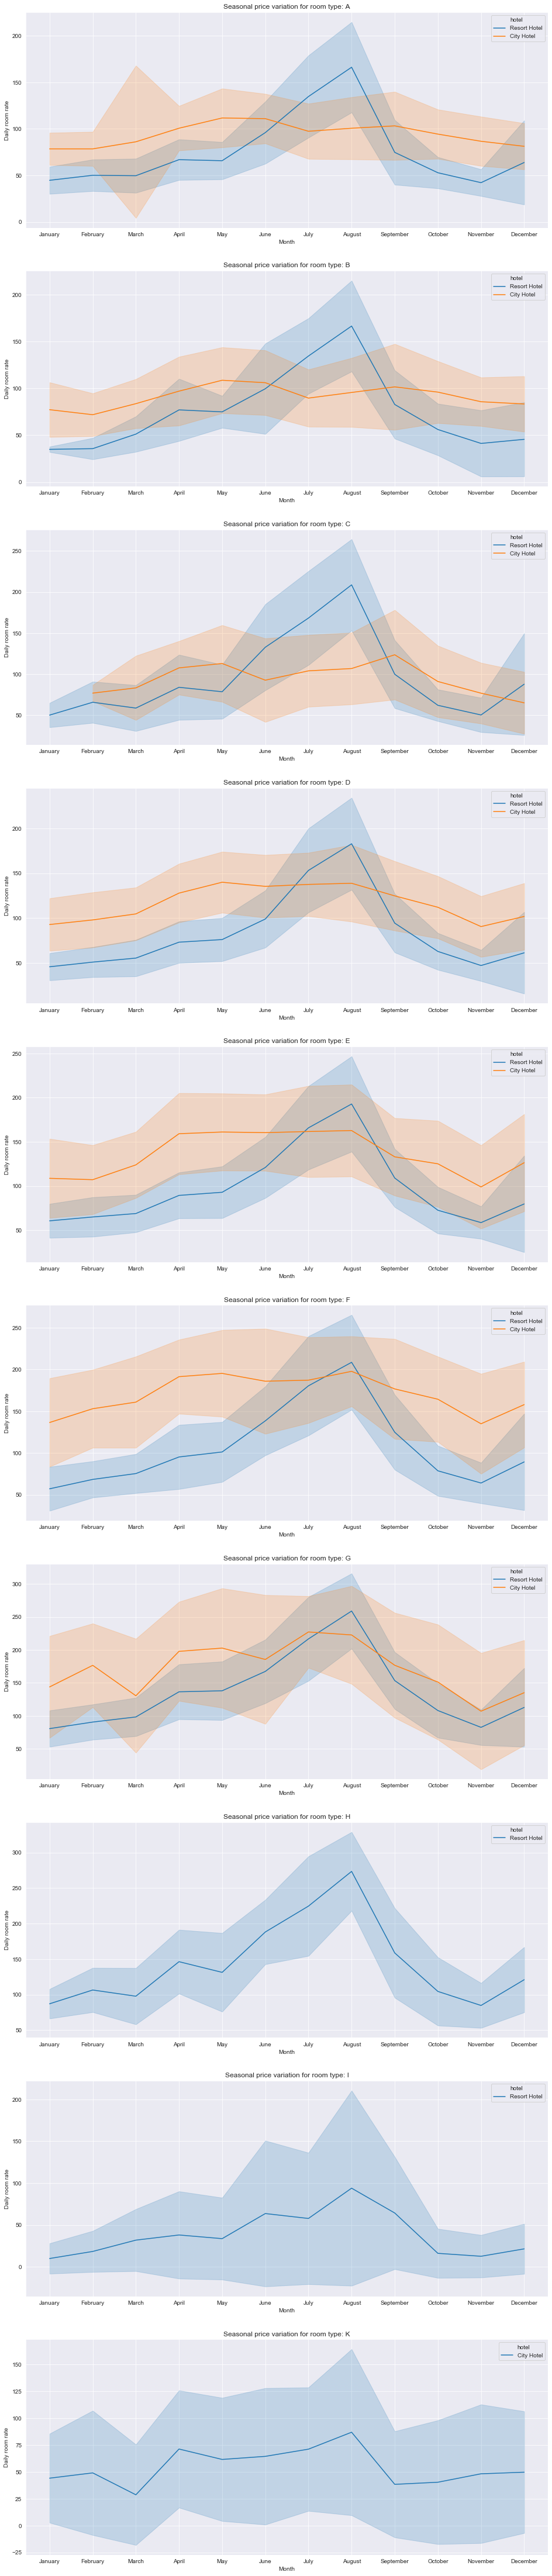

In [21]:
fig,ax = plt.subplots(figsize = (16,80))
#plt.figure(figsize=(16, 8))

i = 1;
for room_type in room_price['assigned_room_type'].sort_values().unique()[:10]:
    plt.subplot(10,1,i)
    sns.lineplot(x = 'arrival_date_month', y = 'adr', data = room_price[room_price['assigned_room_type'] == room_type],
                 hue = 'hotel', ci='sd')
    plt.title('Seasonal price variation for room type: '+room_type)
    plt.xlabel('Month')
    plt.ylabel('Daily room rate')
    i = i+1
plt.show()


#### _It is interesting to see that price of City Hotel majorly depends on the type of the room but price of Resort Hotel varies by season_

## Finding demand for rooms during each month:

In [23]:
monthly_booking = df.groupby(['hotel','arrival_date_month','guest_type'], as_index = False).agg({'adults':'count'})

monthly_booking['arrival_date_month'] = pd.Categorical(monthly_booking["arrival_date_month"],
                                                 categories=ordered_months, ordered=True)

monthly_booking.rename(columns = {'adults': 'no. of bookings'}, inplace = True)
monthly_booking.sort_values(by = 'arrival_date_month').head()

,hotel,arrival_date_month,guest_type,no. of bookings
17,City Hotel,January,No guest,6
18,City Hotel,January,Only children,18
58,Resort Hotel,January,Family,1422
16,City Hotel,January,Family,2512
60,Resort Hotel,January,Single adult,769


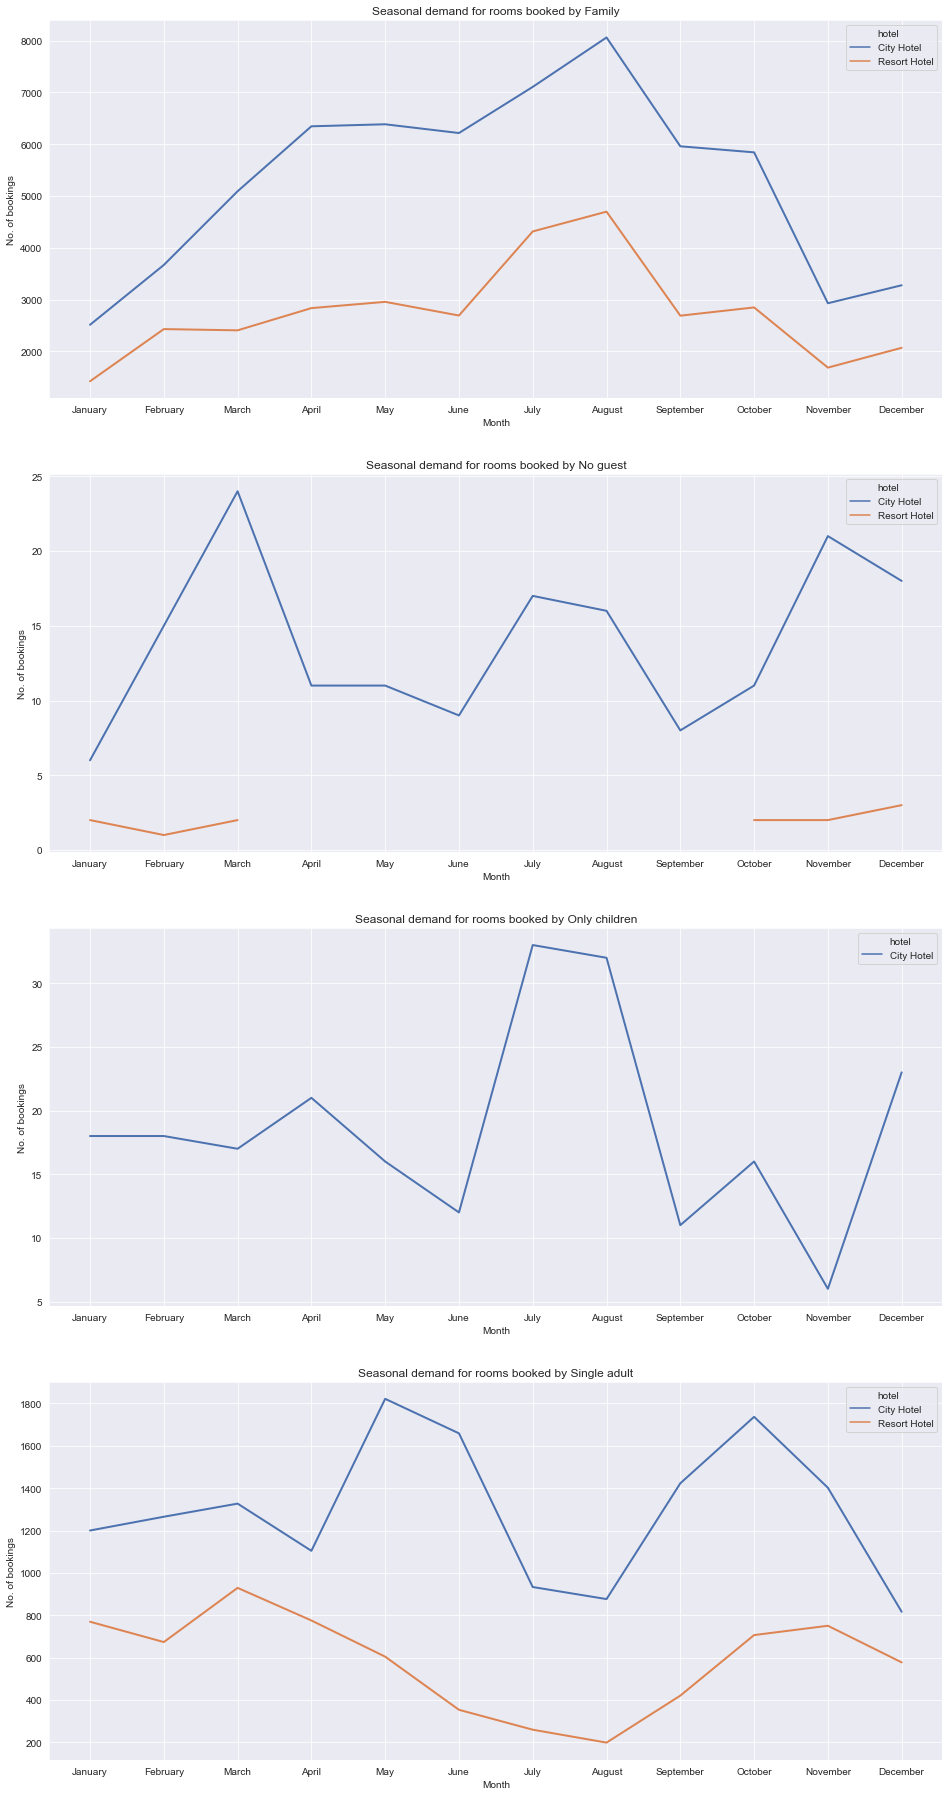

In [149]:
fig,ax = plt.subplots(figsize = (16,32))
sns.set_style("darkgrid")
sns.set_palette("deep")

i = 1;
for guest_type in monthly_booking['guest_type'].unique():
    plt.subplot(4,1,i)
    sns.lineplot(x = 'arrival_date_month', y = 'no. of bookings',
                 data = monthly_booking[monthly_booking['guest_type'] == guest_type], hue = 'hotel', lw = 2)
    plt.title('Seasonal demand for rooms booked by '+guest_type)
    plt.xlabel('Month')
    plt.ylabel('No. of bookings')
    i = i+1
plt.show()

#### _The result of this comparison plot is intuitive and interesting. Number of bookings made by family is highest during Summer vacation. Single adult booking is highest during months of May, June and October. Hence Family and Single adult travel season seem to be a bit mutually exclusive_

## Duration of stay at Hotels:

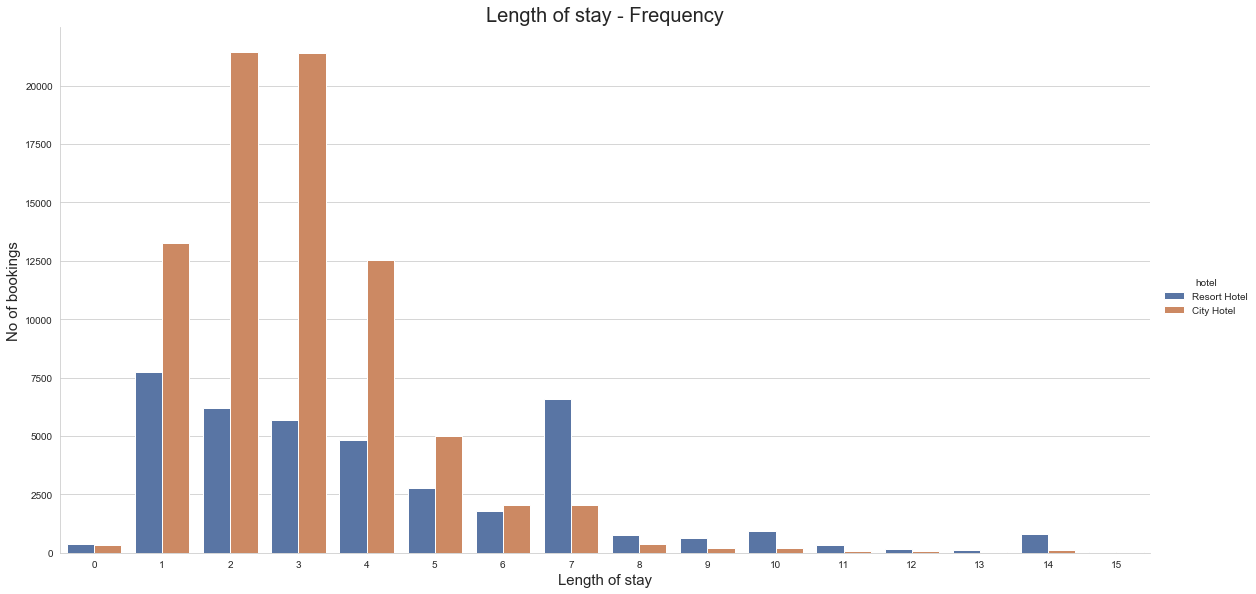

In [145]:
sns.catplot(x = 'duration_of_stay', kind = 'count', hue = 'hotel', palette = 'deep',
            data = df[df['duration_of_stay']<16], height = 8, aspect = 2)
plt.title('Length of stay - Frequency', size = 20)
plt.xlabel('Length of stay', size = 15)
plt.ylabel('No of bookings', size = 15)
plt.show()

#### _Stays over a week's duration are more frequent in Resort Hotels than City Hotels. In City Hotels, the average stay period is 2 or 3 days_

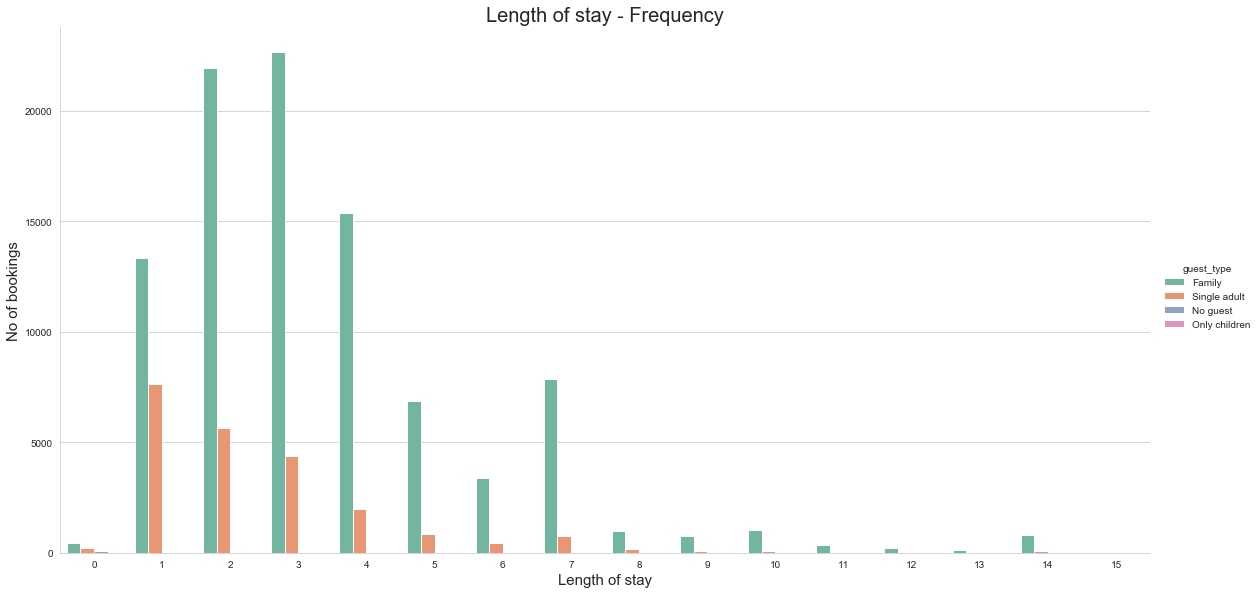

In [140]:
sns.set_style('whitegrid')
sns.catplot(x = 'duration_of_stay', kind = 'count', hue = 'guest_type', palette = 'Set2',
            data = df[df['duration_of_stay']<16], height = 8, aspect = 2)
plt.title('Length of stay - Frequency', size = 20)
plt.xlabel('Length of stay', size = 15)
plt.ylabel('No of bookings', size = 15)
plt.show()

#### _Single adults usually stay for just one night but families tend to stay for longer durations_

In [88]:
df.groupby('market_segment', as_index = False).agg({'lead_time':'mean'})

,market_segment,lead_time
0,Aviation,4.443038
1,Complementary,13.286676
2,Corporate,22.125590
3,Direct,49.859115
4,Groups,186.973096
5,Offline TA/TO,135.004459
6,Online TA,82.998725
7,Undefined,1.500000


## Average rates in each Market Segment:

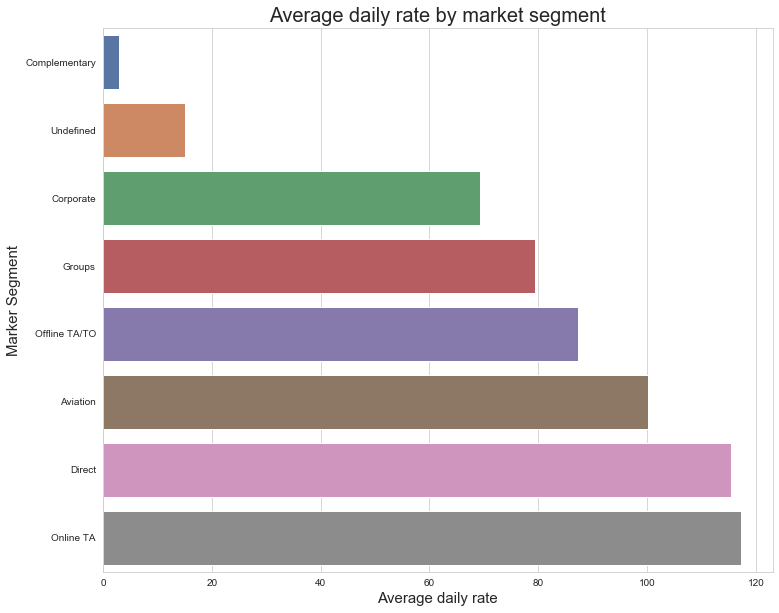

In [139]:
market_seg_price = df.groupby('market_segment', as_index = False).agg({'adr':'mean'})

fig = plt.figure(figsize = (12,10))
sns.barplot(y = 'market_segment', x = 'adr', data = market_seg_price.sort_values(by = 'adr'))
plt.title('Average daily rate by market segment', size = 20)
plt.ylabel('Marker Segment', size = 15)
plt.xlabel('Average daily rate', size = 15)
plt.show()

#### _This chart confirms that prices are lower when booked through corporates as they have partnerships and when booked in groups or with an offline Travel Agency. It is surprising to see that Online Travel Agencies on the other hand have high rates_

## Comparing booking lead time with daily rates:

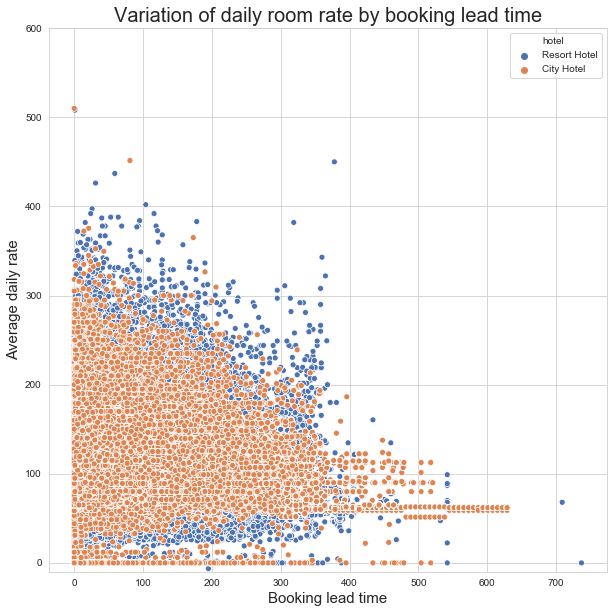

In [138]:
plt.figure(figsize=(10, 10))
plt.ylim(-10, 600)
sns.scatterplot(df['lead_time'], df['adr'], hue = df['hotel'])
plt.xlabel('Booking lead time', size = 15)
plt.ylabel('Average daily rate', size = 15)
plt.title('Variation of daily room rate by booking lead time', size = 20)
plt.show()

#### _We can see that as lead time is small, there is high variation in the daily rate, which gradually reduces as lead time increases_

## Cancellations in each Hotel types:

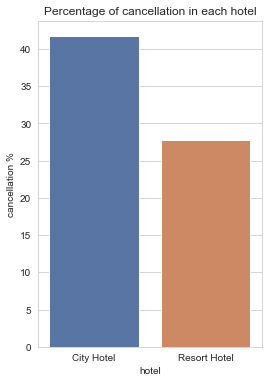

In [121]:
hotel_cancel = df.groupby('hotel', as_index = False).agg({'is_canceled':'mean'})
hotel_cancel['is_canceled'] = round(hotel_cancel['is_canceled']*100,2)
hotel_cancel.rename(columns = {'is_canceled': 'cancellation %'}, inplace = True)
hotel_cancel

fig = plt.figure(figsize = (4,6))
sns.barplot(x = 'hotel', y = 'cancellation %', data = hotel_cancel)
plt.title('Percentage of cancellation in each hotel')
plt.show()

## Impact of assigning a different room type than the one booked:

In [129]:
df['room_type_change'] = np.where(df['reserved_room_type'] != df['assigned_room_type'],'Changed','Same')

room_change_cancel = df.groupby('room_type_change', as_index = False).agg({'is_canceled':'mean'})
room_change_cancel['is_canceled'] = round(room_change_cancel['is_canceled']*100,2)
room_change_cancel.rename(columns = {'is_canceled': 'cancellation %'}, inplace = True)
room_change_cancel

,room_type_change,cancellation %
0,Changed,5.38
1,Same,41.56


#### _It was expected that cancellation rates will be high when the type of room booked is reassigned by the hotel management. But surprisingly the cancellation rates in such instances are only 5% whereas mornally the average cancellation rate is over 40%_

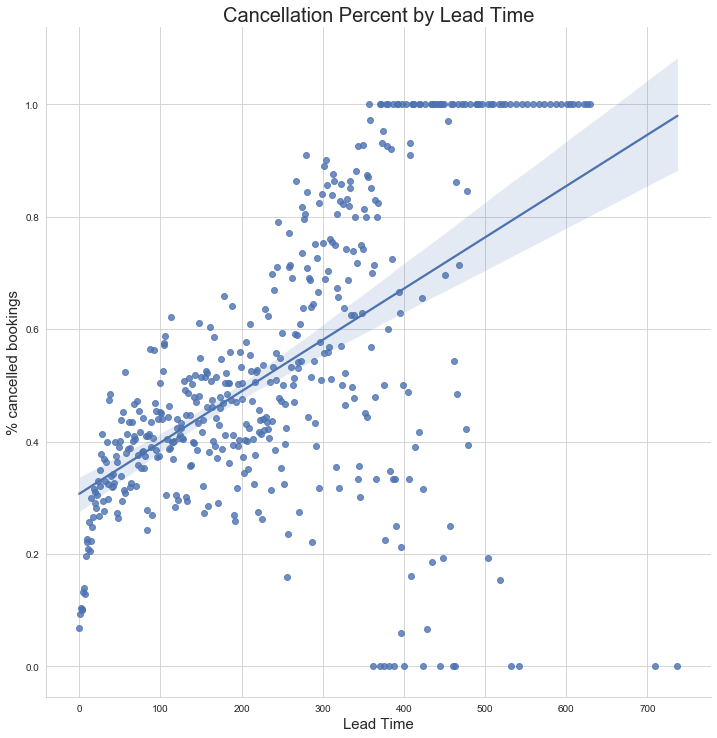

In [137]:
lead_time_cancel = df.groupby('lead_time', as_index = False).agg({'is_canceled':'mean'})

sns.lmplot(x = 'lead_time', y ='is_canceled', data = lead_time_cancel, height = 10, aspect = 1)
plt.xlabel('Lead Time', size = 15)
plt.ylabel('% cancelled bookings', size = 15)
plt.title('Cancellation Percent by Lead Time', size = 20)
plt.show()